# Useful Viewfactors

Three cases for spacecraft hand calculations are provided:

1. Nadir face
2. Side face
3. Sphere to sphere (very small to very large)

These are shown below:

## References:

1.  "A CATALOG OF RADIATION HEAT TRANSFER CONFIGURATION FACTORS", John R. Howell, University of Texas at Austin, http://www.thermalradiation.net/tablecon.html

2. "Radiative Viewfactors", Isidorio Martinez, http://webserver.dmt.upm.es/~isidoro/tc3/Radiation%20View%20factors.pdf

## Nadir Facing Case

In [1]:
from IPython.display import Image
Image(url="http://www.thermalradiation.net/images/B-39fig.gif", width=400)

$$H = \frac{h}{r}\\$$
$$F_{1-2} = \left( \frac{1}{H} \right) ^2$$

## Side Facing Case

In [2]:
Image(url="http://www.thermalradiation.net/images/B-40fig.gif", width=400)

$$H = \frac{h}{r}\\$$
$$F_{1-2} = \frac{1}{\pi} \left[ \tan^{-1}\left( {\frac{1}{\sqrt{H^2-1}}} \right)-\frac{\sqrt{H^2-1}}{H^2} \right]$$

## Sphere-to-Sphere Case

In [3]:
Image(url="http://www.thermalradiation.net/calc/images/C-137fig_n.gif", width=400)

$$r_2 >> r_1\\$$
$$H = \frac{r_1+s+r_2}{r_2}\\$$
$$F_{1-2} = \frac{1}{2} \left( 1 -  \sqrt{1 - \frac{1}{H^2}} \right)$$ 

In [16]:
import numpy as np

Re = 6378. #km
r1 = 0.001 # 1 m in km
s = np.logspace(-1, 5, num=600) #km - altitude


H = (s+Re)/Re
H_s = (s+r1+Re)/Re

F_12_nadir = H**-2
F_12_side = 1/np.pi*(np.arctan(1/np.sqrt(H**2-1))-np.sqrt(H**2-1)/H**2)
F_12_s2s = 0.5*(1-np.sqrt(1-1/H_s**2))

In [5]:
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [18]:
p = figure(x_range=[0.1, 1e5], y_range=[0., 1.], x_axis_type="log", 
           width=900, height=700, 
           title="Viewfactor vs. Altitude above Earth",
          tools="pan,wheel_zoom,box_zoom,reset,crosshair, save")

p.xaxis.axis_label = 'Altitude (km)'
p.yaxis.axis_label = 'Viewfactor'
p.background_fill_color = "khaki"

p.xgrid.grid_line_color = 'black'
p.xgrid[0].grid_line_alpha=0.8
p.xgrid.minor_grid_line_color = 'black'
p.xgrid.minor_grid_line_alpha = 0.2

p.ygrid.grid_line_color = 'black'
p.ygrid[0].grid_line_alpha=0.8
p.ygrid.minor_grid_line_color = 'black'
p.ygrid.minor_grid_line_alpha = 0.25

l1 = p.line(x=s, y=F_12_nadir, color='red', line_width=2, legend='Nadir facing')
p.add_tools(HoverTool(renderers=[l1], tooltips=[("(h,F_12_nadir)", "($x, $y)"),]))

l2 = p.line(x=s, y=F_12_side, color='green', line_width=2, legend='Side facing')
p.add_tools(HoverTool(renderers=[l2], tooltips=[("(h,F_12_side)", "($x, $y)"),]))

l3 = p.line(x=s, y=F_12_s2s, color='blue', line_width=2, legend='Sphere-to-Sphere')
p.add_tools(HoverTool(renderers=[l3], tooltips=[("(h,F_12_s2s)", "($x, $y)"),]))

show(p)

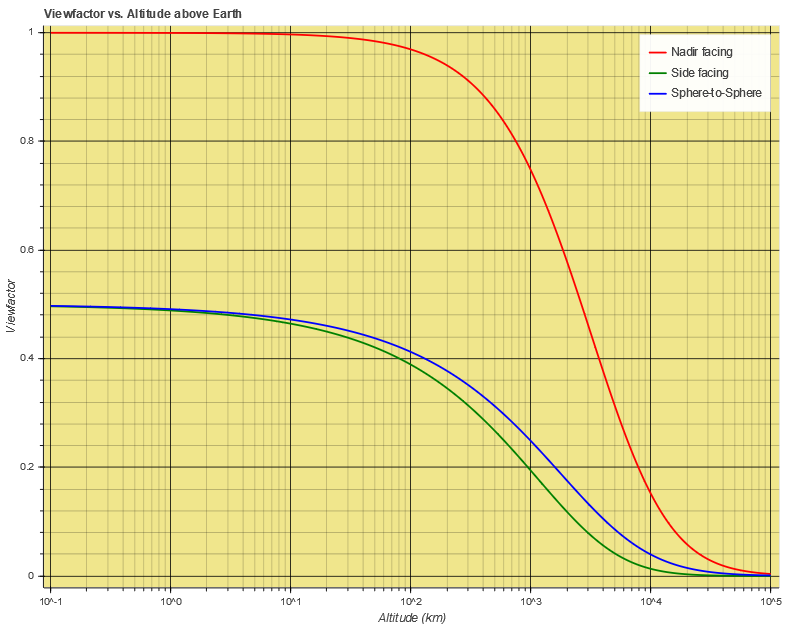

In [12]:
from IPython.display import Image
Image(r'C:\Users\Hugh\Pictures\ESSE3360Images\bokeh_plot.png', width=1000)

In [11]:
from ipywidgets import interact

def viewfactors(h):
    
    Re = 6378. #km
    r1 = 0.001 # 1 m in km

    H = (h+Re)/Re
    H_s = (h+r1+Re)/Re

    F_12_nadir = H**-2
    F_12_side = 1/np.pi*(np.arctan(1/np.sqrt(H**2-1))-np.sqrt(H**2-1)/H**2)
    F_12_s2s = 0.5*(1-np.sqrt(1-1/H_s**2))
    
    msg = 'F_12_nadir = {0:.4f}, F_12_side = {1:.4f}, F_12_s2s = {2:.4f}'.format(F_12_nadir, F_12_side, F_12_s2s)
    
    return msg
    
interact(viewfactors, h=(0., 1.e4, 50))

'F_12_nadir = 0.4481, F_12_side = 0.0752, F_12_s2s = 0.1285'